# Intro to Text Processing, NLP, and Corpus Linguistics

**Sean Trott**

The goal of this tutorial is to give a quick overview of some tools, libraries, and resources to help researchers interested in using **language** as a kind of data. 

It'll focus on:

- Resources for various lexical statistics. 
- Basic text processing methods in Python.
 - Data science tools like `pandas`. 
- More powerful packages: `spaCy` and `nltk`.  

## Quick caveats 

**Caveat (1)**: This tutorial is by no means authoritative! It simply represents some of what I've had to learn along the way in my own research, so hopefully it will be helpful to others looking to do similar things!

**Caveat (2)**: The resources I mention will all be English. Some of them do exist in other languages (like WordNet or SUBTLEX). 

## Import relevant libraries

These libraries will be useful for pretty much any data science-y project involving importing/wrangling/visualizing data. (Note that later on, we'll also import some other relevant, language-specific libraries.)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [2]:
# Progress bar!
from tqdm import tqdm

# Part 1: Useful lexical resources

There are a ton of useful lexical resources out there. These might help you with:

- Analyzing corpus data  
- Creating/balancing stimuli for a psycholinguistic study
- Studying the relationship between variables (like `Age of Acquisition` and `Frequency`)

So Part 1 will involve:

- Quick overview of these resources  
- Demonstrating how to read in datasets in `pandas`  
- Visualizing, merging, and analyzing datasets 

## Partial list of useful resources

There are a number of really useful, freely available resources, particularly for English lexical data.

These are all resources I've benefitted greatly from: 

- [SUBTLEX (Brysbaert & New, 2009)](https://www.ugent.be/pp/experimentele-psychologie/en/research/documents/subtlexus): word token frequency estimates from movie subtitle corpora (50 million tokens total; ~60k word types)  
- [CELEX (Baayen et al, 1996)](https://catalog.ldc.upenn.edu/LDC96L14): includes frequency estimates for individual lemmas, along with POS, etc.  
- [English Lexicon Project (Balota et al, 2007)](https://elexicon.wustl.edu/): lexical decision task RT data, for ~40k real English words and ~40k non-words.  
- [Lancaster Sensorimotor Norms (Lynott et al, 2019)](https://osf.io/7emr6/): about ~40k words, human judgments of how associated a given word is with particular sensory modalities (e.g., Vision, Audition, etc.) and effectors (e.g., Hand, Leg, etc.).  
- [Age of Acquisition Norms (Kuperman et al, 2012)](http://crr.ugent.be/archives/806): age of aqcuisition estimates for ~30k English words. 
- [Concreteness norms (Brysbaert et al, 2014)](http://crr.ugent.be/archives/1330): concreteness norms for ~40k English words. 

## Example 1: Working with Frequency data

Let's start with SUBTLEX, which contains word token frequency estimates from English movie subtitles. 

Lexical frequency is often important in experiments:

- matching frequency across stimuli sets
- predicting RT
- and more!

I've included a `.csv` file of the SUBTLEX data in this repository, so you should be able to load it if you've cloned the repository on your computer.

First, we call the `read_csv` function from the `pandas` library, and pass in the *filepath*. This will create a `DataFrame` object---which is really well-suited to working with large, tabular datasets.

In [3]:
# Read in the dataframe
df_subtlex = pd.read_csv("data/english_subtlex.csv")
# How big is the dataset?
len(df_subtlex)

60384

We can also see exactly what the dataframe looks like by calling the `head` function. This will print out a nice table of the first `N` rows, giving us the ability to see which columns the data includes. The [documentation](https://www.ugent.be/pp/experimentele-psychologie/en/research/documents/subtlexus) tells us that this dataset should contain the following rows:

- `Word`: the word!
- `Freqcount`: #times the word appears in the corpus.  
- `CDcount`: the number of films in which the word appears.  
- `Freqlow`: number of times the word appears starting with a lowercase letter.  
- `CDlow`: number of films in which word appears starting with a lowercase letter.  
- `SUBTLWF`: word frequency, per million words.  
- `Lg10WF`: equivalent to `log10(Freqcount + 1)`, with four-digit precision.  
- `SUBTLCD`: in how many percent of the films the word appears. 
- `Lg10CD`: equivalent to `log10(CDcount + 1)`. 

In [4]:
df_subtlex.head(5)

,Word,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD
0,the,1501908,8388,1339811,8388,29449.18,6.1766,100.00,3.9237
1,to,1156570,8383,1138435,8380,22677.84,6.0632,99.94,3.9235
2,a,1041179,8382,976941,8380,20415.27,6.0175,99.93,3.9234
3,you,2134713,8381,1595028,8376,41857.12,6.3293,99.92,3.9233
4,and,682780,8379,515365,8374,13387.84,5.8343,99.89,3.9232


### Visualizing frequency data

We can also create some simple visualizations of the data. Let's start with just the raw counts:

(array([6.0341e+04, 2.7000e+01, 6.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([2.0000000e+00, 2.1347310e+05, 4.2694420e+05, 6.4041530e+05,
        8.5388640e+05, 1.0673575e+06, 1.2808286e+06, 1.4942997e+06,
        1.7077708e+06, 1.9212419e+06, 2.1347130e+06]),
 <a list of 10 Patch objects>)

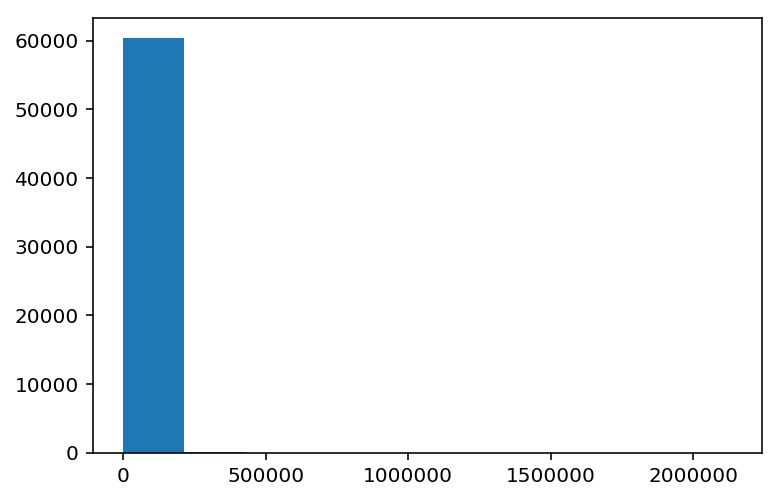

In [5]:
# Use matplotlib to make a histogram of counts
plt.hist(df_subtlex['FREQcount'])

**What's going on here?**

Because frequency is extremely right-skewed (a small number of words are very frequent, and most words are much less frequent), it'll be hard to visualize the raw counts.

Thus, frequency is often analyzed (and visualized) as its **log**:

(array([2.5347e+04, 1.6087e+04, 1.0149e+04, 5.1570e+03, 2.3220e+03,
        8.2300e+02, 3.3000e+02, 1.0600e+02, 5.2000e+01, 1.1000e+01]),
 array([0.4771 , 1.06232, 1.64754, 2.23276, 2.81798, 3.4032 , 3.98842,
        4.57364, 5.15886, 5.74408, 6.3293 ]),
 <a list of 10 Patch objects>)

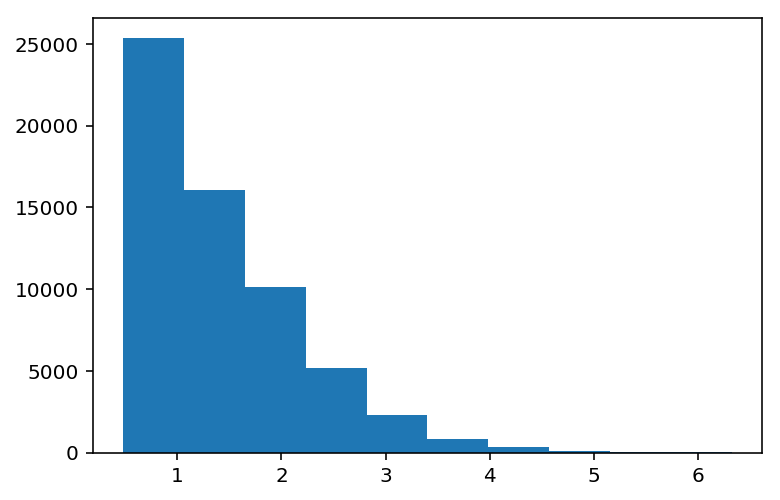

In [6]:
# Histogram of *log* frequencies
plt.hist(df_subtlex['Lg10WF'])

### Zipf's law

Famously, [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) states that word frequency is **inversely proportional** to the *rank frequency* of a word. When visualized, `Frequency ~ Rank(Frequency)` exhibits a classic [power law](https://en.wikipedia.org/wiki/Power_law) relationship. We can visualize that here.

First, we need to calculate **rank frequency**. Fortunately, `pandas` has a built-in function to calculate this:

In [7]:
# Use {column}.rank to frequency in reverse order
df_subtlex['rank_frequency'] = df_subtlex['Lg10WF'].rank(ascending = False)

/Users/seantrott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, '1000 most frequent English words')

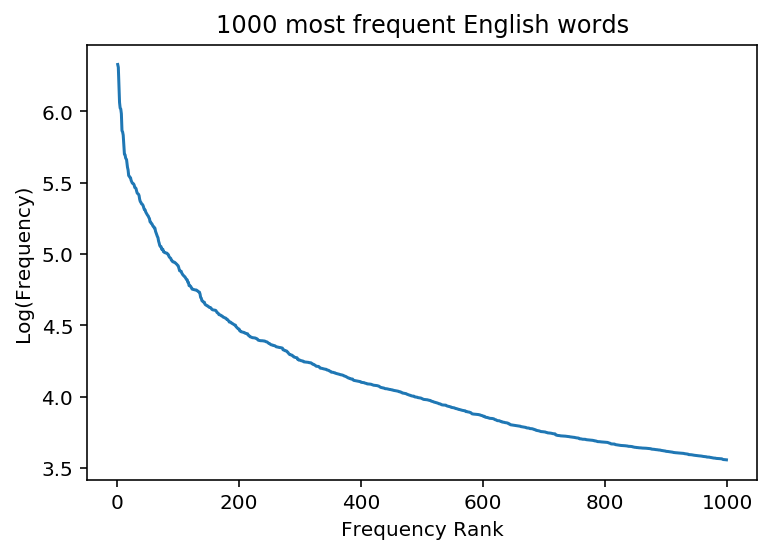

In [8]:
# Now visualize relationship for top 1000 words
sns.lineplot(data = df_subtlex[df_subtlex['rank_frequency'] <1000],
            x = 'rank_frequency',
            y = 'Lg10WF')

plt.xlabel("Frequency Rank")
plt.ylabel("Log(Frequency)")
plt.title("1000 most frequent English words")

### Zipf's law (pt. 2)

There's been a ton of great work trying to model **Zipf's law of frequency**, which is typically represented by the function:

$F(w) = \frac{a}{r(w)^b}$

Where:

- $F(w)$ is the **frequency** of the word  
- $r(w)$ is the **rank frequency** of the word 
- $a$ and $b$ are **learned parameters** relating rank frequency to actual frequency  
 - $a$ is the estimate for $F(w)$ when $r(w) = 1$  
 - $b$ parameterizes the curve's **decay rate**.  

Below, I have a quick example of fitting these parameters using `scipy.optimize.curve_fit`.

In [9]:
# First, we define a function representing Zipf's law
def zipf(x, a, b):
    """Zipf's law, where x = rank, and a&b are the parameters to learn."""
    return a / (x**b)

In [10]:
## Let's set up our x and y variables
df_frequencies_top_n = df_subtlex[df_subtlex['rank_frequency']<1000]
x = df_frequencies_top_n['rank_frequency'].values
y = df_frequencies_top_n['Lg10WF'].values

In [11]:
from scipy.optimize import curve_fit

## Use 'curve_fit' to fit our actual data to this function
z_popt, z_pcov = curve_fit(zipf, x, y)
## Our estimated *parameters*
z_popt

array([7.87104712, 0.11029162])

In [12]:
# We can then use these learned parameters to generate predictions
y_pred = zipf(x, *z_popt)
# Assign to new column in dataframe
df_frequencies_top_n['y_pred'] = y_pred

/Users/seantrott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, "Zipf's law of frequency")

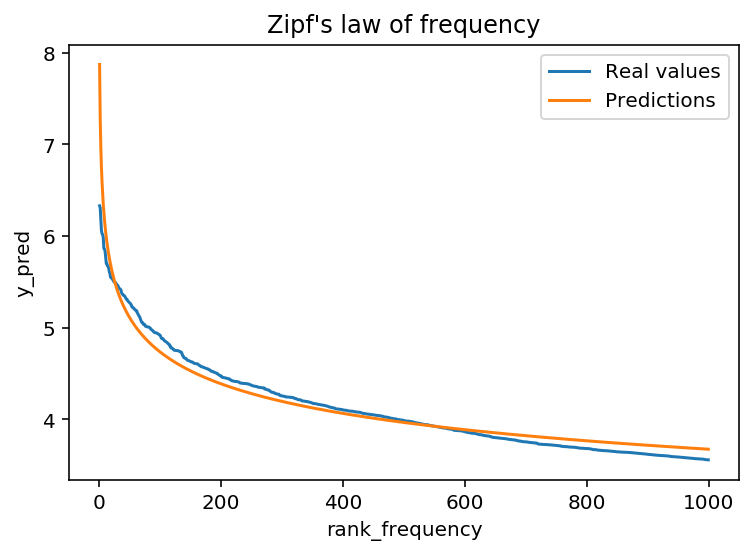

In [13]:
# We could also plot the *normalized* log frequency on the y-axis
# This relationship is called *Zipf's Law*
sns.lineplot(data = df_frequencies_top_n,
            x = 'rank_frequency',
            y = 'Lg10WF',
            label = "Real values")

sns.lineplot(data = df_frequencies_top_n,
            x = 'rank_frequency',
            y = 'y_pred',
            label = "Predictions")

plt.title("Zipf's law of frequency")

## Controlling and matching stimuli

So that was a brief detour into modeling frequency data.

What else might you use these frequency estimates for?

Among other things, a common use for psycholinguists designing their own experiment is to **match** stimuli for something like word frequency. This is useful if you want to balance across conditions, or match filler items. 

### Generating critical items

To make this a little simpler, let's just randomly sample words from our frequency dataset, and pretend those are the items we're interested in.

In [14]:
critical_items = df_subtlex['Word'].sample(100, random_state = 10).values
critical_items

array(['fellows', 'Euripides', 'reemphasize', 'visual', 'whirling',
       'slashing', 'scapula', 'hover', 'misheard', 'swells', 'virtuoso',
       'hypnotizes', 'supermom', 'testimonials', 'Dongs', 'shoehorn',
       'cosmically', 'debug', 'Bordeaux', 'snorkeling', 'cloudless',
       'grinds', 'scuttle', 'fantasized', 'woodworking', 'sovereigns',
       'reorganized', 'sags', 'Grandee', 'Salvor', 'crinoid', 'pruning',
       'fabric', 'citrus', 'heliotrope', 'makeups', 'unofficially',
       'sorry', 'cosmetics', 'Clio', 'teleport', 'gunnysack', 'rococo',
       'unmatched', 'Marilyn', 'overqualified', 'lawyerly', 'recliner',
       'squirreled', 'ankh', 'shifts', 'Crete', 'slayer', 'quackeries',
       'Triassic', 'bribing', 'Pix', 'blacklist', 'spackle',
       'subcontractor', 'occasioned', 'baptised', 'Benzine', 'tumbles',
       'employee', 'corks', 'Captioning', 'sorter', 'spur', 'communistic',
       'combative', 'amps', 'byte', 'phosphorescence', 'reshoots',
       'chitlins'

### Get frequency estimates for these words

Note that we *could've* just sampled the frequency information along with the words themselves, but I'm trying to make this harder!

Let's start by turning those critical words into a dataframe.

In [15]:
df_critical = pd.DataFrame(critical_items, columns=['Word'])
df_critical.head(5)

,Word
0,fellows
1,Euripides
2,reemphasize
3,visual
4,whirling


In [16]:
# Now we can just call `pd.merge` on our frequency data.
df_merged = pd.merge(df_critical, 
                     df_subtlex[['Word', 'Lg10WF']], 
                     on="Word")
df_merged.head(5)

,Word,Lg10WF
0,fellows,2.8306
1,Euripides,0.9031
2,reemphasize,0.4771
3,visual,2.7686
4,whirling,1.5563


(array([35., 22., 26.,  8.,  2.,  5.,  1.,  0.,  0.,  1.]),
 array([0.4771 , 0.90689, 1.33668, 1.76647, 2.19626, 2.62605, 3.05584,
        3.48563, 3.91542, 4.34521, 4.775  ]),
 <a list of 10 Patch objects>)

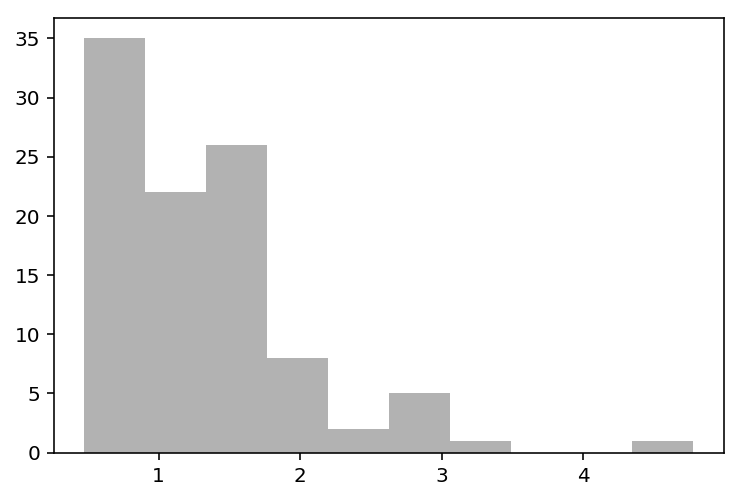

In [17]:
plt.hist(df_merged['Lg10WF'], label = "critical", alpha = .6, color = "gray")

### Find matched words

Now comes the tricky part. We need to identify *another* set of 100 words in our frequency dataset that matches the frequency distribution above.

How can we do this?

### Find matched words

Here's one solution.

For each critical word:

1. Identify candidate words within some `THRESHOLD` of the target word.  
2. Randomly sample from this set of candidate words, and keep track of that sampled item.  

Now repeat 1-2 for each target word, making sure we don't sample the same word twice.

In [18]:
sampled = [] ## Keep track of the words we've sampled already
FREQ_THRESHOLD = 1 ## Feel free to play around with the stringency of our threshold
fillers = []

In [19]:
for index, row in df_merged.iterrows(): ## This will iterate through each *row* of our critical dataframe
    freq = row['Lg10WF']
        
    # Now filter our subtlex dataframe to words with frequency values in the appropriate range
    df_tmp = df_subtlex[(df_subtlex['Lg10WF']<freq+FREQ_THRESHOLD)&(df_subtlex['Lg10WF']>freq-FREQ_THRESHOLD)]
    
    # FOR PRACTICE:
    # How would you also match for POS, Concreteness, AoA, ...?
    
    # Now sample from that dataframe
    while True:
        filler_row = df_tmp.sample(n = 1)
        if filler_row['Word'].iloc[0] not in sampled:
            fillers.append(filler_row)
            sampled.append(filler_row['Word'].iloc[0])
            break
    

In [20]:
df_fillers = pd.concat(fillers)
df_fillers.head(5)

,Word,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,rank_frequency
2024,rude,1125,885,1094,871,22.06,3.0515,10.55,2.9474,2458.0
31072,resonates,11,11,11,11,0.22,1.0792,0.13,1.0792,34444.5
24595,sorriest,19,19,19,19,0.37,1.3010,0.23,1.3010,27903.0
7335,suspension,222,152,212,148,4.35,2.3483,1.81,2.1847,7494.0
6064,feathers,291,204,264,194,5.71,2.4654,2.43,2.3118,6312.5


### Compare our distributions

They look very similar. That's good! That means we've done a good job matching.

As noted above, feel free to play around with `FREQ_THRESHOLD` variable--the larger you make the threshold (i.e., the more "relaxed"/less stringent it is), the less tightly our distributions will be matched.

(array([28., 23., 18., 14.,  7.,  5.,  2.,  1.,  0.,  2.]),
 array([0.4771 , 0.80801, 1.13892, 1.46983, 1.80074, 2.13165, 2.46256,
        2.79347, 3.12438, 3.45529, 3.7862 ]),
 <a list of 10 Patch objects>)

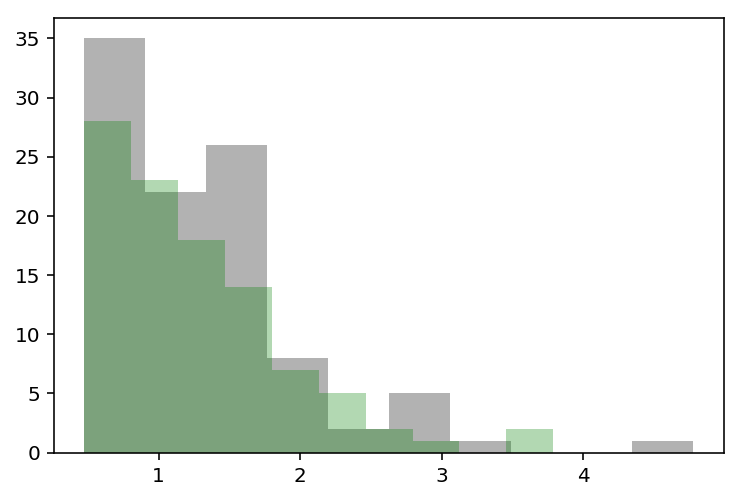

In [21]:
plt.hist(df_merged['Lg10WF'], label = "critical", alpha = .6, color = "gray")
plt.hist(df_fillers['Lg10WF'], label = "fillers", alpha = .3, color = "green")

# Example 2: Merging multiple lexical resources

What if you want to look at how `Frequency` relates to other variables, like `Age of Acquisition` or `Concreteness`?

This is a common **data science** problem. We have multiple datasets, and we want to **join** (i.e., **merge**) them in some way.

Let's walk through how that'd work below.

In [22]:
# First, let's read in an AoA dataset
df_aoa = pd.read_csv("data/english_aoa_norms.csv")
len(df_aoa)

31318

In [23]:
df_aoa.head(5)

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
0,a,22.0,22.0,20415.27,2.89,1.21,1.00
1,aardvark,18.0,18.0,0.41,9.89,3.66,1.00
2,abacus,20.0,13.0,0.24,8.69,3.77,0.65
3,abalone,18.0,13.0,0.51,12.23,3.54,0.72
4,abandon,19.0,19.0,8.10,8.32,2.75,1.00


In [24]:
# How can we merge this with our frequency dataset?
df_aoa.head(5)

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
0,a,22.0,22.0,20415.27,2.89,1.21,1.00
1,aardvark,18.0,18.0,0.41,9.89,3.66,1.00
2,abacus,20.0,13.0,0.24,8.69,3.77,0.65
3,abalone,18.0,13.0,0.51,12.23,3.54,0.72
4,abandon,19.0,19.0,8.10,8.32,2.75,1.00


In [25]:
## now we should merge these datasets. 
## We'll lose some rows b/c not all the same words are in both.
df_merged = pd.merge(df_aoa, df_subtlex, on = "Word")
len(df_merged)

25191

In [26]:
df_merged.head(5)

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,rank_frequency
0,a,22.0,22.0,20415.27,2.89,1.21,1.00,1041179,8382,976941,8380,20415.27,6.0175,99.93,3.9234,6.0
1,aardvark,18.0,18.0,0.41,9.89,3.66,1.00,21,12,14,8,0.41,1.3424,0.14,1.1139,26732.0
2,abacus,20.0,13.0,0.24,8.69,3.77,0.65,12,10,10,9,0.24,1.1139,0.12,1.0414,33312.5
3,abalone,18.0,13.0,0.51,12.23,3.54,0.72,26,11,14,9,0.51,1.4314,0.13,1.0792,24320.0
4,abandon,19.0,19.0,8.10,8.32,2.75,1.00,413,312,345,281,8.10,2.6170,3.72,2.4955,5024.0


Text(0.5, 1.0, 'Aoa ~ Frequency')

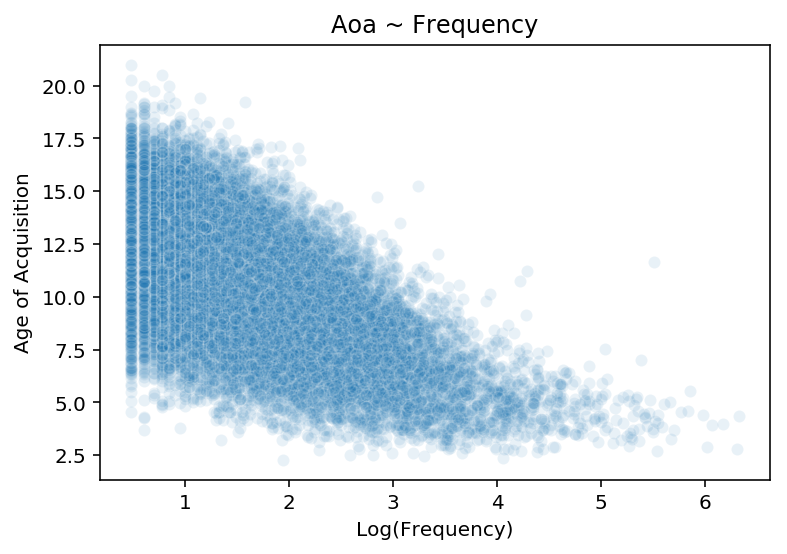

In [27]:
## Now we can visualize this relationship

sns.scatterplot(data = df_merged,
               x = "Lg10WF",
               y = "Rating.Mean",
               alpha = .1)

plt.ylabel("Age of Acquisition")
plt.xlabel("Log(Frequency)")
plt.title("Aoa ~ Frequency")

## Conclusion of Part 1

Hopefully, **Part 1** has been a helpful introduction to:

- The wide variety of lexical resources that exist  
- How to read those datasets into Python using `pandas`  
- How to merge, visualize, and analyze those datasets  

# Part 2: Basic text processing

In **Part 2**, I'll talk briefly about manipulating *strings* in Python––using built-in methods that don't require installing other packages.

I'll just focus on a simple example to start: counting the number of times that a word occurs in a passage, using built-in Python methods.

## Counting occurrences

A common task is counting how many times some word occurs in a passage, or across some set of passages. 

For example, maybe you think that a passage contains a **metaphor**, and so you want to know whether there are any words associated with that metaphor.

In [155]:
## target words to search for
battle_words = ['fight', 'win', 'war', 'battle']

In [156]:
## Now let's consider a few example sentences
example_passages = [
    'The war on climate change is just beginning!',
    'We have been battling climate change for years',
    'Win the war on global warming!'
]

### Methods for counting words 

How could we count the number of times each `battle_word` occurs in each sentence?

There are a couple different approaches to this. The first couple I'll describe use variants of **string matching**: i.e., they check whether a substring in a sentence perfectly matches one of our target words.

What are some possibe limitations to exact string matching for counting words?

In [157]:
## Method 1: split each sentence into words, and count number of battle words
from collections import Counter

all_counts = []
for p in example_passages:
    p = p.lower() # Make lowercase!
    words = p.split(" ") # Split based on spaces (not always appropriate!)
    
    # Count #occurrences of each word in sentence
    counts = Counter(words)
    
    # Get counts for each battle word
    battle_counts = [(i, counts[i]) for i in battle_words]
    all_counts.append((p, battle_counts))

In [158]:
## This is what we get. How did we do?
all_counts

[('the war on climate change is just beginning!',
  [('fight', 0), ('win', 0), ('war', 1), ('battle', 0)]),
 ('we have been battling climate change for years',
  [('fight', 0), ('win', 0), ('war', 0), ('battle', 0)]),
 ('win the war on global warming!',
  [('fight', 0), ('win', 1), ('war', 1), ('battle', 0)])]

### The need to lemmatize

We missed "battling" because we only included the string **battle**.

There are at least two solutions here:

- Include `battling` as well!
- Lemmatize our words

I'll skip these solutions for now, but note that `nltk` (reviewed later) has methods to **lemmatize** each word in a string. This would change `battling` to `battle`, so we could match it in the counting process.

In [159]:
## Method 2: Regex
import re
r = re.compile(r'\bbattle\b|\bfight\b|\win\b|\war\b')

In [160]:
all_counts = []
for p in example_passages:
    p = p.lower() # Make lowercase!
    words = p.split(" ") # Split based on spaces (not always appropriate!)
    
    # Use regex to find matches of each string
    groups = r.findall(p)
    battle_counts = Counter(groups)
    all_counts.append((p, battle_counts))

In [161]:
## How did we do?
all_counts

[('the war on climate change is just beginning!', Counter({'war': 1})),
 ('we have been battling climate change for years', Counter()),
 ('win the war on global warming!', Counter({'win': 1, 'war': 1}))]

# Part 2: Using `nltk` and `spaCy`

Many Python packages are free to install and use. 

Here, I'll focus on two widely used libraries: 

- `nltk` (the Natural Language Toolkit for Python)
- `spaCy`

both come with their own detailed set of documentation, so the goal here is really just to introduce you to some of their basic affordances.

## Using `nltk`

The `nltk` library comes with its own free [book](https://www.nltk.org/book/), which is really fantastic. Each chapter deals with a different issue, from [accessing text corpora](https://www.nltk.org/book/ch02.html) to using [classifiers](https://www.nltk.org/book/ch06.html). 

I'm going to discuss two resources/tools that I use frequently from `nltk`: sentiment analysis and WordNet. 

### Sentiment analysis

The basic goal of sentiment analysis is to label/predict the "sentiment" of a piece of text. A simple version of this is labeling text as **positive** or **negative**. 

`nltk` has its own page on [sentiment analysis](https://www.nltk.org/howto/sentiment.html), so I'm going to focus here on a particular tool *within* `nltk` that's pretty plug-and-play. 

#### Sentiment analysis: logic

The simplest possible approach to sentiment analysis might be something like:

1. Compile a dictionary of words.  
2. For each word, label whether it's positive or negative.  
3. For a given sentence, add up all the positive and negative words in that sentence and return the sum (or average). 

This "bag of words" approach sounds simplistic (and it is), but it can also be surprisingly effective! It's the basis behind lots of NLP tools like [LIWC](https://liwc.wpengine.com/), which of course has more dimensions than simply **valence**.

The downside to a purely bag of words approach is, of course, that words have different meanings in different contexts! 

*Example*: the word "good" might be positive in "the food was good", but the use of negation ("the food was *not* good") flips the valence.

#### Sentiment analysis: VADER

On the spectrum of simple to complex, [VADER](https://ojs.aaai.org/index.php/ICWSM/article/view/14550) is probably closer to "simple", but there are some clever design features that make it better than the simplest approach.

To give a very simple example: 

VADER builds upon this simple principle and adds five simple rules or heuristics. Here's a summary, pretty much copied/pasted from their paper:  

1. Punctuation (like "!") increases magnitude/intensity of sentiment without affecting semantic orientation.  
2. Capitalization increases the magnitude/intensity of sentiment without affecting semantic orientation.
3. Degree modifiers (like "marginally" or "extremely") increase or decrease magnitude/intensity of sentiment without affecting semantic orientation.  
4. The contrastive conjunction "but" signals a shift in polarity, meaning that VADER should focus on the text immediately following "but". 
5. By looking at the tri-gram preceding a very "sentimental" word, VADER can catch cases where negation flips the semantic orientation/valence.  

In [28]:
## First, we need to make sure we have downloaded the "Vader Sentiment lexicon"
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seantrott/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
## Now we import and create the VADER object
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [30]:
## Let's try VADER out on a simple sentence
ss = sid.polarity_scores("The food was delicious")
ss

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

### Unpacking this information

VADER gives us a `dictionary`, which breaks down the model's confidence that the statement was:

- negative  
- neutral
- positive

It also contains a `compound` score, which averages the valence scores across the words.

In [31]:
## Now let's add puncutation: we see that it increases the overall sentiment!
ss = sid.polarity_scores("The food was delicious!!")
ss['compound']

0.6467

In [32]:
## Now let's try this on a trickier sentence, involving negation. We see that "not" flips the orientation!
ss = sid.polarity_scores("The food was not delicious!!")
ss['compound']

-0.5547

### Limitations to sentiment analysis

Of course, VADER isn't perfect. 

- Many aspects of sentiment are context-dependent  
- Other aspects might be in the "eye of the beholder"

But VADER is a nice, plug-and-play model to get an estimate of text valence.

In [34]:
## Example: 
## VADER thinks this sentence is negative, 
## possibly just because of the word "gun".
## But different people might think it's positive or negative...
ss = sid.polarity_scores("Congress passes gun control legislation.")
ss['compound']

-0.34

#### Applications

But sentiment analysis is still a useful tool for our NLP toolbox. It allows you to run analyses like [this one](https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-016-0093-1) (Reagan et al, 2016), in which the authors argue that most well-read novels have one of six possible "narrative arcs". 

### WordNet

`nltk` also comes with a number of corpora, including WordNet. Again, `nltk` has a [great tutorial](https://www.nltk.org/howto/wordnet.html) on working with WordNet, so here I'll just limit this to a brief demonstration. 

In [35]:
## Import wordnet corpus
from nltk.corpus import wordnet as wn

#### Synsets

In [37]:
## WordNet maps words onto "synsets"; each synset is a set of synonyms with a common meaning
bank_synsets = wn.synsets('bank')

In [39]:
## With "bank", we can print out the definition of each synset
for ss in bank_synsets:
    print("{name}: {definition}\n".format(name = ss.name(), definition = ss.definition()))

bank.n.01: sloping land (especially the slope beside a body of water)

depository_financial_institution.n.01: a financial institution that accepts deposits and channels the money into lending activities

bank.n.03: a long ridge or pile

bank.n.04: an arrangement of similar objects in a row or in tiers

bank.n.05: a supply or stock held in reserve for future use (especially in emergencies)

bank.n.06: the funds held by a gambling house or the dealer in some gambling games

bank.n.07: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force

savings_bank.n.02: a container (usually with a slot in the top) for keeping money at home

bank.n.09: a building in which the business of banking transacted

bank.n.10: a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)

bank.v.01: tip laterally

bank.v.02: enclose with a bank

bank.v.03: do business with a bank or keep an account at a

In [40]:
## Some synsets are also annotated with examples
wn.synset('bank.n.01').examples()

['they pulled the canoe up on the bank',
 'he sat on the bank of the river and watched the currents']

In [41]:
## Some synsets are also annotated with examples
wn.synset('bank.n.02').examples()

['he cashed a check at the bank', 'that bank holds the mortgage on my home']

In [42]:
## Synsets also have hypernyms and hyponyms
wn.synset('bank.n.02').hypernyms()

[Synset('financial_institution.n.01')]

In [43]:
## Synsets also have hypernyms and hyponyms
wn.synset('bank.n.02').hyponyms()

[Synset('acquirer.n.02'),
 Synset('agent_bank.n.02'),
 Synset('commercial_bank.n.01'),
 Synset('credit_union.n.01'),
 Synset('federal_reserve_bank.n.01'),
 Synset('home_loan_bank.n.01'),
 Synset('lead_bank.n.01'),
 Synset('member_bank.n.01'),
 Synset('merchant_bank.n.01'),
 Synset('state_bank.n.01'),
 Synset('thrift_institution.n.01')]

#### Measuring distance between synsets

Importantly, WordNet's synsets are structured in a taxonomy. So we can measure the distance between different synsets in a couple ways.

In [44]:
## "Path similarity" identifies the shortest path between the two synsets in the taxonomy 
wn.synset('bank.n.02').path_similarity(wn.synset('bank.n.01'))

0.07692307692307693

In [45]:
## "Path similarity" identifies the shortest path between the two synsets in the taxonomy 
wn.synset('bank.n.02').path_similarity(wn.synset('acquirer.n.02'))

0.5

#### Calculating polysemy

What if you want to get an estimate of how many meanings each unique word in a lexicon has?

In [46]:
### if you want to look at all words in (English) WordNet, you can call this function:
words = list(wn.words())

In [47]:
## Now we could count the number of senses for each word!
senses = []
for w in tqdm(words):
    for ss in wn.synsets(w):
        senses.append({
            'word': w,
            'sense': ss.name(),
            'definition': ss.definition()
        })

100%|██████████| 147306/147306 [00:13<00:00, 10763.93it/s]


In [48]:
## They've got some random words in here!
df_senses = pd.DataFrame(senses)
df_senses.sample(5, random_state = 42)

,definition,sense,word
153644,the time of a particular event,occasion.n.04,occasion
3123,feeling shame or guilt or embarrassment or rem...,ashamed.a.01,ashamed
171882,cut a rebate in (timber or stone),rebate.v.02,rebate
39898,having feet that turn outward,splayfooted.a.01,splayfooted
114627,genus of shrubs or herbs of tropical Asia and ...,genus_lespedeza.n.01,genus_lespedeza


In [49]:
## Lots of meanings in WordNet:
len(df_senses)

227733

In [50]:
## But if we collapse across multiple senses of a word, we can count a word's polysemy
## Group by each unique word, and count number of entries for that word
df_collapsed = df_senses.groupby('word').count().reset_index()  
len(df_collapsed) ## Should be #words

147306

In [51]:
## About 1.5 meanings per word
df_collapsed['sense'].mean()

1.545985906887703

In [52]:
## The most polysemous word has 75 meanings!
df_collapsed['sense'].max()

75

In [53]:
## Let's view the most polysemous words
df_collapsed.sort_values(by = 'sense', ascending = False).head(5)

,word,definition,sense
17074,break,75,75
17598,broken,72,72
32687,cut,70,70
17597,broke,60,60
17122,breaking,60,60


In [54]:
## We could also rank by polysemy, and visualize that distribution
df_collapsed['polysemy_rank'] = df_collapsed['sense'].rank(ascending = False)

/Users/seantrott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, '#senses')

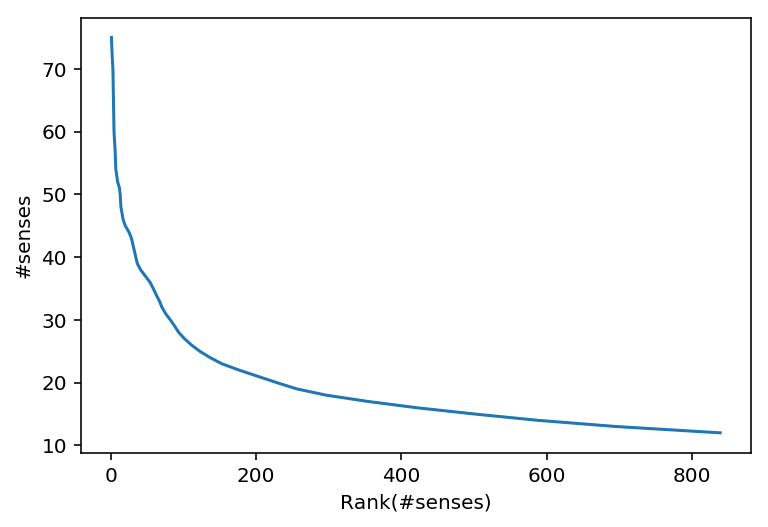

In [55]:
sns.lineplot(data = df_collapsed[df_collapsed['polysemy_rank']<1000],
            x = 'polysemy_rank',
            y = 'sense')

plt.xlabel("Rank(#senses)")
plt.ylabel("#senses")

## Using `spaCy`

Like `nltk`, `spaCy` has great [documentation](https://spacy.io/). Here, I'll just show a couple of the cool things you can do with this library:

- Producing a dependency parse of a sentence  
- Getting the noun phrases in a sentence

In [56]:
import spacy

In [58]:
## Load English spacy---you can also use spaCy for 
## German, Dutch, and other languages (https://spacy.io/models)
nlp = spacy.load("en")

### Producing and visualizing dependency parses

Producing a dependency parse is strikingly straightforward! 

Just pass a string into the `nlp` object. The `displacy` function can be used to display the parsed sentence.

In [59]:
from spacy import displacy

In [60]:
doc = nlp("The man went to the store")

In [62]:
displacy.render(doc, style="dep", options = {'compact': True})

### Unpacking this result

This is a **dependency parse**.

That is, each word token is labeled with a **directed link** to or from another word (and is also labeled with a part of speech).  

If you want to access these labels (rather than just visualize them), you can iterate through the `doc` object:

In [63]:
for i in doc:
    print("Word: {w}, \n  POS: {pos}, \n  Head: {head}, \n  Dependency label: {dep}".format(
    w = i.text, pos = i.pos_, dep = i.dep_, head = i.head))

Word: The, 
  POS: DET, 
  Head: man, 
  Dependency label: det
Word: man, 
  POS: NOUN, 
  Head: went, 
  Dependency label: nsubj
Word: went, 
  POS: VERB, 
  Head: went, 
  Dependency label: ROOT
Word: to, 
  POS: ADP, 
  Head: went, 
  Dependency label: prep
Word: the, 
  POS: DET, 
  Head: store, 
  Dependency label: det
Word: store, 
  POS: NOUN, 
  Head: to, 
  Dependency label: pobj


### Noun phrases

We can also use this `doc` object to return all the noun phrases (`noun_chunks`) in a given string.

In [64]:
for nc in doc.noun_chunks:
    print(nc.text)
    print("  Root: " + nc.root.text)
    print("  Root POS: " + nc.root.tag_)
    print("  Determiner: " + nc[0].text)
    print("  Determiner POS: " + nc[0].tag_)

The man
  Root: man
  Root POS: NN
  Determiner: The
  Determiner POS: DT
the store
  Root: store
  Root POS: NN
  Determiner: the
  Determiner POS: DT


# Conclusion

To sum up what we've learned:

- **Part 1** introduced some lexical resources that might be of use.  
- **Part 2** introduced some basic text processing methods.  
- **Part 3** introduced two Python packages, `nltk` and `spacy`, that can help with text processing.

This is only the tip of the iceberg, but hopefully it helps you get started doing text processing in Python!